In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
#text classification 

In [3]:
#spam .csv= This is dataset of mobile sms,we have all the messages over here and for each #messages, a category has been
# given so a message either a spam or a not spam

In [4]:
df = pd.read_csv("spam.csv", encoding='latin1')
df

,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,not spam,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,not spam,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,not spam,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.isnull().sum()/df.shape[0]*100

category       0.000000
message        0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [6]:
#to delete unwanted column
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df

,category,message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,not spam,Will Ì_ b going to esplanade fr home?
5569,not spam,"Pity, * was in mood for that. So...any other s..."
5570,not spam,The guy did some bitching but I acted like i'd...


In [8]:
#now use first wordCloud
#call wordcloud; inbuilt class
from wordcloud import WordCloud,STOPWORDS

In [9]:
# Create an object of the WordCloud class
my_cloud = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)

In [10]:
my_cloud.generate(''.join(df[df['category']=='spam']['message']))

In [11]:
# Save the word cloud to a file
my_cloud.to_file('picture.png')

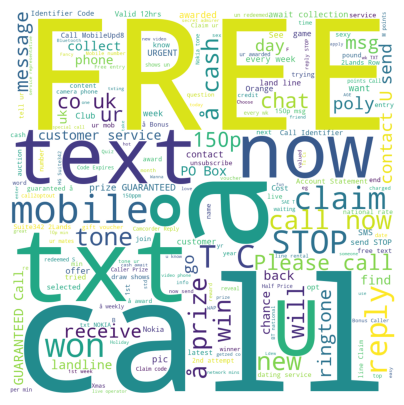

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

In [13]:
# Create an object of the WordCloud class
my_cloud_notspam = WordCloud(width=1000, height=1000, background_color="white",min_font_size=10)
my_cloud_notspam.generate(''.join(df[df['category']=='not spam']['message']))


In [14]:
# Save the word cloud to a file
my_cloud_notspam.to_file('picture_notspam.png')

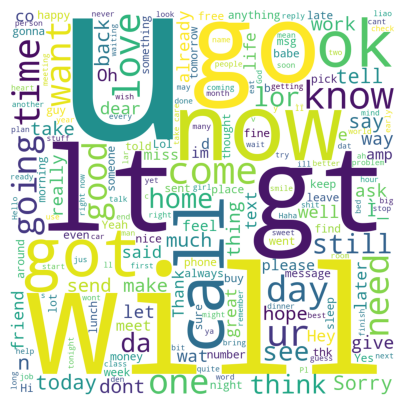

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(my_cloud_notspam)
plt.axis('off')
plt.show()

In [16]:
#text preprocessing:-
#remove stopwords
#list of stopwords
stop=stopwords.words('english') #user define object


In [17]:
#user define function for preprocessing of text
def clean_text(text):           #here clean_text() is a user define passing argument function
    #converting lower case  and then tokenize it
    token=word_tokenize(text.lower())
    #filter only the alphabet use inbuilt functions isalpha() #remove number and special character from text
    word_token=[t for t in token if t.isalpha()] #word token user define list object
    #remove stopwords
    #use list comphrension
    print(token)
    print(word_token)
    clean_tokens=[t for t in word_token if t not in stop] 
    
    print(clean_tokens)
    #next step of preprocessing :Lemmanitzation
    
    #create object of WordnetLemmanitzater class
    lemma=WordNetLemmatizer()
    lemmatized_token=[lemma.lemmatize(t) for t in clean_tokens]
    return " ".join(lemmatized_token)

In [18]:
# clean_text("Meena I am 123 wolves wolf wolfies studied study studies study to the if a or not Pandey@gmail.com")

In [19]:
#we apply the same clean_text() on the entire column of Message of dataset
df['message']=df['message'].apply(clean_text) #passing the function in apply() inbuilt function
#df[message] is a parameter

['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810075over18', "'s"]
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'may', 'tex

['urgent', '!', 'your', 'mobile', 'number', 'has', 'been', 'awarded', 'with', 'a', 'å£2000', 'prize', 'guaranteed', '.', 'call', '09058094455', 'from', 'land', 'line', '.', 'claim', '3030.', 'valid', '12hrs', 'only']
['urgent', 'your', 'mobile', 'number', 'has', 'been', 'awarded', 'with', 'a', 'prize', 'guaranteed', 'call', 'from', 'land', 'line', 'claim', 'valid', 'only']
['urgent', 'mobile', 'number', 'awarded', 'prize', 'guaranteed', 'call', 'land', 'line', 'claim', 'valid']
['send', 'this', 'to', 'ur', 'friends', 'and', 'receive', 'something', 'about', 'ur', 'voice', '.....', 'how', 'is', 'my', 'speaking', 'expression', '?', '1.childish', '2.naughty', '3.sentiment', '4.rowdy', '5.ful', 'of', 'attitude', '6.romantic', '7.shy', '8.attractive', '9.funny', '&', 'lt', ';', '#', '&', 'gt', ';', '.irritating', '&', 'lt', ';', '#', '&', 'gt', ';', '.lovable', '.', 'reply', 'me', '..']
['send', 'this', 'to', 'ur', 'friends', 'and', 'receive', 'something', 'about', 'ur', 'voice', 'how', 'is'

['are', 'you', 'in', 'castor', '?', 'you', 'need', 'to', 'see', 'something']
['are', 'you', 'in', 'castor', 'you', 'need', 'to', 'see', 'something']
['castor', 'need', 'see', 'something']
['sunshine', 'quiz', 'wkly', 'q', '!', 'win', 'a', 'top', 'sony', 'dvd', 'player', 'if', 'u', 'know', 'which', 'country', 'liverpool', 'played', 'in', 'mid', 'week', '?', 'txt', 'ansr', 'to', '82277.', 'å£1.50', 'sp', ':', 'tyrone']
['sunshine', 'quiz', 'wkly', 'q', 'win', 'a', 'top', 'sony', 'dvd', 'player', 'if', 'u', 'know', 'which', 'country', 'liverpool', 'played', 'in', 'mid', 'week', 'txt', 'ansr', 'to', 'sp', 'tyrone']
['sunshine', 'quiz', 'wkly', 'q', 'win', 'top', 'sony', 'dvd', 'player', 'u', 'know', 'country', 'liverpool', 'played', 'mid', 'week', 'txt', 'ansr', 'sp', 'tyrone']
['u', 'have', 'a', 'secret', 'admirer', 'who', 'is', 'looking', '2', 'make', 'contact', 'with', 'u-find', 'out', 'who', 'they', 'r', '*', 'reveal', 'who', 'thinks', 'ur', 'so', 'special-call', 'on', '09058094565']
[

['ya', 'tel', 'wats', 'ur', 'problem']
['ya', 'tel', 'wats', 'ur', 'problem']
['no', '.', '1', 'nokia', 'tone', '4', 'ur', 'mob', 'every', 'week', '!', 'just', 'txt', 'nok', 'to', '87021', '.', '1st', 'tone', 'free', '!', 'so', 'get', 'txtin', 'now', 'and', 'tell', 'ur', 'friends', '.', '150p/tone', '.', '16', 'reply', 'hl', '4info']
['no', 'nokia', 'tone', 'ur', 'mob', 'every', 'week', 'just', 'txt', 'nok', 'to', 'tone', 'free', 'so', 'get', 'txtin', 'now', 'and', 'tell', 'ur', 'friends', 'reply', 'hl']
['nokia', 'tone', 'ur', 'mob', 'every', 'week', 'txt', 'nok', 'tone', 'free', 'get', 'txtin', 'tell', 'ur', 'friends', 'reply', 'hl']
['i', 'dnt', 'wnt', 'to', 'tlk', 'wid', 'u']
['i', 'dnt', 'wnt', 'to', 'tlk', 'wid', 'u']
['dnt', 'wnt', 'tlk', 'wid', 'u']
['we', 'spend', 'our', 'days', 'waiting', 'for', 'the', 'ideal', 'path', 'to', 'appear', 'in', 'front', 'of', 'us', '..', 'but', 'what', 'we', 'forget', 'is', '..', '\\paths', 'are', 'made', 'by', 'walking', '..', 'not', 'by', 'wait

['do', 'have', 'a', 'nice', 'day', 'today', '.', 'i', 'love', 'you', 'so', 'dearly', '.']
['do', 'have', 'a', 'nice', 'day', 'today', 'i', 'love', 'you', 'so', 'dearly']
['nice', 'day', 'today', 'love', 'dearly']
['aiyo', 'a', 'bit', 'pai', 'seh', 'ì_', 'noe', '...', 'scared', 'he', 'dun', 'rem', 'who', 'i', 'am', 'then', 'die', '...', 'hee', '...', 'but', 'he', 'become', 'better', 'lookin', 'oredi', 'leh', '...']
['aiyo', 'a', 'bit', 'pai', 'seh', 'noe', 'scared', 'he', 'dun', 'rem', 'who', 'i', 'am', 'then', 'die', 'hee', 'but', 'he', 'become', 'better', 'lookin', 'oredi', 'leh']
['aiyo', 'bit', 'pai', 'seh', 'noe', 'scared', 'dun', 'rem', 'die', 'hee', 'become', 'better', 'lookin', 'oredi', 'leh']
['aight', ',', 'i', "'ll", 'ask', 'a', 'few', 'of', 'my', 'roommates']
['aight', 'i', 'ask', 'a', 'few', 'of', 'my', 'roommates']
['aight', 'ask', 'roommates']
['now', ',', 'whats', 'your', 'house', '#', 'again', '?', 'and', 'do', 'you', 'have', 'any', 'beer', 'there', '?']
['now', 'whats'

['alrite', 'jod', 'hows', 'the', 'revision', 'goin', '?', 'keris', 'bin', 'doin', 'a', 'smidgin', '.', 'n', 'e', 'way', 'u', 'wan', 'na', 'cum', 'over', 'after', 'college', '?', 'xx']
['alrite', 'jod', 'hows', 'the', 'revision', 'goin', 'keris', 'bin', 'doin', 'a', 'smidgin', 'n', 'e', 'way', 'u', 'wan', 'na', 'cum', 'over', 'after', 'college', 'xx']
['alrite', 'jod', 'hows', 'revision', 'goin', 'keris', 'bin', 'doin', 'smidgin', 'n', 'e', 'way', 'u', 'wan', 'na', 'cum', 'college', 'xx']
['if', 'you', 'have', 'belive', 'me', '.', 'come', 'to', 'my', 'home', '.']
['if', 'you', 'have', 'belive', 'me', 'come', 'to', 'my', 'home']
['belive', 'come', 'home']
['oh', 'k.k', '..', 'where', 'did', 'you', 'take', 'test', '?']
['oh', 'where', 'did', 'you', 'take', 'test']
['oh', 'take', 'test']
['those', 'were', 'my', 'exact', 'intentions']
['those', 'were', 'my', 'exact', 'intentions']
['exact', 'intentions']
['haha', 'but', 'no', 'money', 'leh', '...', 'later', 'got', 'to', 'go', 'for', 'tuitio

['urgent', '!', 'we', 'are', 'trying', 'to', 'contact', 'u.', 'todays', 'draw', 'shows', 'that', 'you', 'have', 'won', 'a', 'å£800', 'prize', 'guaranteed', '.', 'call', '09050003091', 'from', 'land', 'line', '.', 'claim', 'c52', '.', 'valid', '12hrs', 'only']
['urgent', 'we', 'are', 'trying', 'to', 'contact', 'todays', 'draw', 'shows', 'that', 'you', 'have', 'won', 'a', 'prize', 'guaranteed', 'call', 'from', 'land', 'line', 'claim', 'valid', 'only']
['urgent', 'trying', 'contact', 'todays', 'draw', 'shows', 'prize', 'guaranteed', 'call', 'land', 'line', 'claim', 'valid']
['there', 'r', 'many', 'model', '..', 'sony', 'ericson', 'also', 'der', '..', '&', 'lt', ';', '#', '&', 'gt', ';', '..', 'it', 'luks', 'good', 'bt', 'i', 'forgot', 'modl', 'no']
['there', 'r', 'many', 'model', 'sony', 'ericson', 'also', 'der', 'lt', 'gt', 'it', 'luks', 'good', 'bt', 'i', 'forgot', 'modl', 'no']
['r', 'many', 'model', 'sony', 'ericson', 'also', 'der', 'lt', 'gt', 'luks', 'good', 'bt', 'forgot', 'modl']


['ur', 'going', '2', 'banot', 'spamas', '!', 'callfreefone', '08081560665', 'and', 'speak', 'to', 'a', 'live', 'operator', 'to', 'claim', 'either', 'banot', 'spamas', 'cruise', 'ofå£2000', 'cash', '18+only', '.', 'to', 'opt', 'out', 'txt', 'x', 'to', '07786200117']
['ur', 'going', 'banot', 'spamas', 'callfreefone', 'and', 'speak', 'to', 'a', 'live', 'operator', 'to', 'claim', 'either', 'banot', 'spamas', 'cruise', 'cash', 'to', 'opt', 'out', 'txt', 'x', 'to']
['ur', 'going', 'banot', 'spamas', 'callfreefone', 'speak', 'live', 'operator', 'claim', 'either', 'banot', 'spamas', 'cruise', 'cash', 'opt', 'txt', 'x']
['havent', 'still', 'waitin', 'as', 'usual', '...', 'ìï', 'come', 'back', 'sch', 'oredi', '?']
['havent', 'still', 'waitin', 'as', 'usual', 'ìï', 'come', 'back', 'sch', 'oredi']
['havent', 'still', 'waitin', 'usual', 'ìï', 'come', 'back', 'sch', 'oredi']
['in', 'meeting', 'da', '.', 'i', 'will', 'call', 'you']
['in', 'meeting', 'da', 'i', 'will', 'call', 'you']
['meeting', 'da',

['wamma', 'get', 'laid', '?', 'want', 'real', 'doggin', 'locations', 'sent', 'direct', 'to', 'your', 'mobile', '?', 'join', 'the', 'uks', 'largest', 'dogging', 'network', '.', 'txt', 'dogs', 'to', '69696', 'now', '!', 'nyt', '.', 'ec2a', '.', '3lp', 'å£1.50/msg', '.']
['wamma', 'get', 'laid', 'want', 'real', 'doggin', 'locations', 'sent', 'direct', 'to', 'your', 'mobile', 'join', 'the', 'uks', 'largest', 'dogging', 'network', 'txt', 'dogs', 'to', 'now', 'nyt']
['wamma', 'get', 'laid', 'want', 'real', 'doggin', 'locations', 'sent', 'direct', 'mobile', 'join', 'uks', 'largest', 'dogging', 'network', 'txt', 'dogs', 'nyt']
['carlos', 'says', 'we', 'can', 'pick', 'up', 'from', 'him', 'later', 'so', 'yeah', 'we', "'re", 'set']
['carlos', 'says', 'we', 'can', 'pick', 'up', 'from', 'him', 'later', 'so', 'yeah', 'we', 'set']
['carlos', 'says', 'pick', 'later', 'yeah', 'set']
['hey', 'babe', ',', 'my', 'friend', 'had', 'to', 'cancel', ',', 'still', 'up', 'for', 'a', 'visit', '?']
['hey', 'babe',

['hey', 'sexy', 'buns', '!', 'have', 'i', 'told', 'you', '?', 'i', 'adore', 'you', ',', 'loverboy', '.', 'i', 'hope', 'you', 'remember', 'to', 'thank', 'your', 'sister', 'in', 'law', 'for', 'those', 'meatballs', '*', 'grins', '*', '...', 'i', 'love', 'you', ',', 'babe']
['hey', 'sexy', 'buns', 'have', 'i', 'told', 'you', 'i', 'adore', 'you', 'loverboy', 'i', 'hope', 'you', 'remember', 'to', 'thank', 'your', 'sister', 'in', 'law', 'for', 'those', 'meatballs', 'grins', 'i', 'love', 'you', 'babe']
['hey', 'sexy', 'buns', 'told', 'adore', 'loverboy', 'hope', 'remember', 'thank', 'sister', 'law', 'meatballs', 'grins', 'love', 'babe']
['may', 'b', 'approve', 'panalam', '...', 'but', 'it', 'should', 'have', 'more', 'posts', '..']
['may', 'b', 'approve', 'panalam', 'but', 'it', 'should', 'have', 'more', 'posts']
['may', 'b', 'approve', 'panalam', 'posts']
['spjanuary', 'male', 'sale', '!', 'hot', 'gay', 'chat', 'now', 'cheaper', ',', 'call', '08709222922.', 'national', 'rate', 'from', '1.5p/mi

['think', '+', 'da', '.', 'you', 'wil', 'do', '.']
['think', 'da', 'you', 'wil', 'do']
['think', 'da', 'wil']
['i', "'m", 'awake', 'oh', '.', 'what', "'s", 'up', '.']
['i', 'awake', 'oh', 'what', 'up']
['awake', 'oh']
['good', 'afternoon', 'my', 'boytoy', '.', 'how', 'goes', 'that', 'walking', 'here', 'and', 'there', 'day', '?', 'did', 'you', 'get', 'that', 'police', 'abstract', '?', 'are', 'you', 'still', 'out', 'and', 'about', '?', 'i', 'wake', 'and', 'miss', 'you', 'babe']
['good', 'afternoon', 'my', 'boytoy', 'how', 'goes', 'that', 'walking', 'here', 'and', 'there', 'day', 'did', 'you', 'get', 'that', 'police', 'abstract', 'are', 'you', 'still', 'out', 'and', 'about', 'i', 'wake', 'and', 'miss', 'you', 'babe']
['good', 'afternoon', 'boytoy', 'goes', 'walking', 'day', 'get', 'police', 'abstract', 'still', 'wake', 'miss', 'babe']
['how', 'much', 'u', 'trying', 'to', 'get', '?']
['how', 'much', 'u', 'trying', 'to', 'get']
['much', 'u', 'trying', 'get']
['come', 'around', '&', 'lt', ';

['hey', 'come', 'online', '!', 'use', 'msn', '...', 'we', 'are', 'all', 'there']
['hey', 'come', 'online', 'use', 'msn', 'we', 'are', 'all', 'there']
['hey', 'come', 'online', 'use', 'msn']
['i', "'m", 'fine', '.', 'hope', 'you', 'are', 'good', '.', 'do', 'take', 'care', '.']
['i', 'fine', 'hope', 'you', 'are', 'good', 'do', 'take', 'care']
['fine', 'hope', 'good', 'take', 'care']
['oops', 'i', 'was', 'in', 'the', 'shower', 'when', 'u', 'called', '.', 'hey', 'a', 'parking', 'garage', 'collapsed', 'at', 'university', 'hospital', '.', 'see', 'i', "'m", 'not', 'crazy', '.', 'stuff', 'like', 'that', 'does', 'happen', '.']
['oops', 'i', 'was', 'in', 'the', 'shower', 'when', 'u', 'called', 'hey', 'a', 'parking', 'garage', 'collapsed', 'at', 'university', 'hospital', 'see', 'i', 'not', 'crazy', 'stuff', 'like', 'that', 'does', 'happen']
['oops', 'shower', 'u', 'called', 'hey', 'parking', 'garage', 'collapsed', 'university', 'hospital', 'see', 'crazy', 'stuff', 'like', 'happen']
['aiyo', 'u', 

['you', 'should', 'get', 'more', 'chicken', 'broth', 'if', 'you', 'want', 'ramen', 'unless', 'there', "'s", 'some', 'i', 'do', "n't", 'know', 'about']
['you', 'should', 'get', 'more', 'chicken', 'broth', 'if', 'you', 'want', 'ramen', 'unless', 'there', 'some', 'i', 'do', 'know', 'about']
['get', 'chicken', 'broth', 'want', 'ramen', 'unless', 'know']
['my', 'slave', '!', 'i', 'want', 'you', 'to', 'take', '2', 'or', '3', 'pictures', 'of', 'yourself', 'today', 'in', 'bright', 'light', 'on', 'your', 'cell', 'phone', '!', 'bright', 'light', '!']
['my', 'slave', 'i', 'want', 'you', 'to', 'take', 'or', 'pictures', 'of', 'yourself', 'today', 'in', 'bright', 'light', 'on', 'your', 'cell', 'phone', 'bright', 'light']
['slave', 'want', 'take', 'pictures', 'today', 'bright', 'light', 'cell', 'phone', 'bright', 'light']
['nope', '.', 'i', 'just', 'forgot', '.', 'will', 'show', 'next', 'week']
['nope', 'i', 'just', 'forgot', 'will', 'show', 'next', 'week']
['nope', 'forgot', 'show', 'next', 'week']


In [20]:
df

,category,message
0,not spam,go jurong point crazy available bugis n great ...
1,not spam,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,not spam,u dun say early hor u c already say
4,not spam,nah think go usf life around though
...,...,...
5567,spam,time tried contact u pound prize claim easy ca...
5568,not spam,b going esplanade fr home
5569,not spam,pity mood suggestion
5570,not spam,guy bitching acted like interested buying some...


In [21]:
df['message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [22]:
#after that next steps:
#separate features and column

In [23]:
df.head()

,category,message
0,not spam,go jurong point crazy available bugis n great ...
1,not spam,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,not spam,u dun say early hor u c already say
4,not spam,nah think go usf life around though


In [24]:
X=df['message'] #input features
Y=df['category'] #output target variable which we want to predict

In [25]:
print(Y)

0       not spam
1       not spam
2           spam
3       not spam
4       not spam
          ...   
5567        spam
5568    not spam
5569    not spam
5570    not spam
5571    not spam
Name: category, Length: 5572, dtype: object


In [26]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
Y=lr.fit_transform(Y)


In [27]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
# def encode(a):
#     index={"spam":1,"notspam":0}
#     return index[a]
# Y=Y.apply(encode)

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [31]:
#now we have clean the data text in hand, the next thind we would like to do is to convert the text into vector/humber
#First we trying the CounterVector():convert text into vectorize

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv=CountVectorizer() #here not passing the stopwords='english' parameter why? #because it take care of all the stopwords


In [34]:
x_train_cv=cv.fit_transform(x_train) #70% data for training
x_test_cv=cv.transform(x_test)#30% testing data

In [35]:
x_train_cv

<3900x5518 sparse matrix of type '<class 'numpy.int64'>'
	with 29662 stored elements in Compressed Sparse Row format>

In [36]:
 print(cv.get_feature_names_out())

['aah' 'aaooooright' 'aathi' ... 'åòit' 'åômorrow' 'ìï']


In [37]:
x_test_cv

<1672x5518 sparse matrix of type '<class 'numpy.int64'>'
	with 11477 stored elements in Compressed Sparse Row format>

In [38]:
x_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
x_test_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
pd.DataFrame(x_train_cv.toarray(),columns=cv.get_feature_names_out())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
pd.DataFrame(x_test_cv.toarray(),columns=cv.get_feature_names_out())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#simplly doing ML or DL
# use classification algorithm for ML

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
# #create a user define function :passing argument and returning  value
# def create_model(model):
#     model.fit(x_train_cv,y_train) #rtrain model with 70% of data
#     y_pred=model.predict(x_test_cv) #test the model with 30% of data
#     #generate rport 
#     print(classification_report(y_test,y_pred))
# #confusion matrix
#     print(confusion_matrix(y_test,y_pred))
#     return model


In [45]:
dtc=DecisionTreeClassifier()

In [46]:
#we train the model with 70%  training of data , use fit() inbuilt method of decisionTreeClassifier class
dtc.fit(x_train_cv,y_train)

DecisionTreeClassifier()

In [47]:
y_pred=dtc.predict(x_test_cv)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [48]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1454
           1       0.86      0.81      0.84       218

    accuracy                           0.96      1672
   macro avg       0.92      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [49]:
print(confusion_matrix(y_test,y_pred))

[[1426   28]
 [  41  177]]


In [50]:
#second score is not bad at all

# 2 TD IDF this is the second type of vectorization technique
#TF :term frequency and IDF: inverse document frequency
#call class Tf-idf vectorizato

In [51]:
tf = TfidfVectorizer()

In [52]:
x_train_tf=tf.fit_transform(x_train) #70% data for training
x_test_tf=tf.transform(x_test)#30% testing data

In [53]:
 print(tf.get_feature_names_out())

['aah' 'aaooooright' 'aathi' ... 'åòit' 'åômorrow' 'ìï']


In [54]:
x_train_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
x_test_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
pd.DataFrame(x_train_tf.toarray(),columns=tf.get_feature_names_out())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
pd.DataFrame(x_test_tf.toarray(),columns=tf.get_feature_names_out())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
dtc1=DecisionTreeClassifier()

In [59]:
#we train the model with 70%  training of data , use fit() inbuilt method of decisionTreeClassifier class
dtc1.fit(x_train_tf,y_train)

DecisionTreeClassifier()

In [60]:
y_pred1=dtc.predict(x_test_tf)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
 print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1454
           1       0.86      0.03      0.05       218

    accuracy                           0.87      1672
   macro avg       0.86      0.51      0.49      1672
weighted avg       0.87      0.87      0.82      1672



In [62]:
print(confusion_matrix(y_test,y_pred1))

[[1453    1]
 [ 212    6]]


In [63]:
# next neural network deep learning

In [64]:
import tensorflow as tf